In [63]:
# %pip install scikit-learn

In [64]:
import pandas as pd

df = pd.read_csv('dataset/refined_data.csv')

In [65]:
from sklearn.model_selection import train_test_split

target = df['HeartDisease'].values
features = df[df.columns.drop(['HeartDisease'])].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def evaluate(classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    report = classification_report(y_test, y_pred)
    print(report)

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

    cv = cross_val_score(classifier, x_train, y_train)
    print(f"Cross Validation (mean ± std): {cv.mean()*100:.2f}% ± {cv.std()*100:.2f}%")

    y_proba = classifier.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {roc_auc*100:.2f}%")

    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1*100:.2f}%")

    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title("ROC Curve")
    plt.show()

    return {"report": report, "cv": cv, "roc_auc": roc_auc, "f1": f1}


Kernel: linear
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        83
           1       0.84      0.92      0.88       101

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184

Cross Validation (mean ± std): 85.83% ± 1.07%
ROC AUC Score: 91.08%
F1 Score: 87.74%


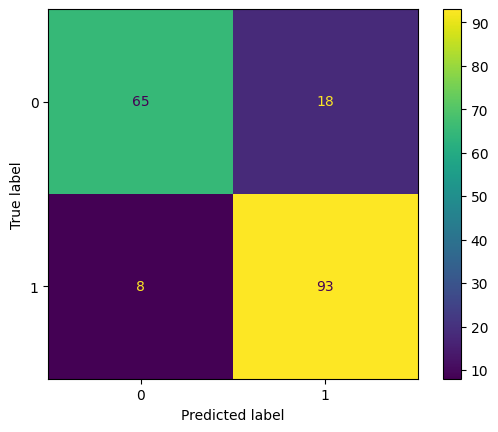

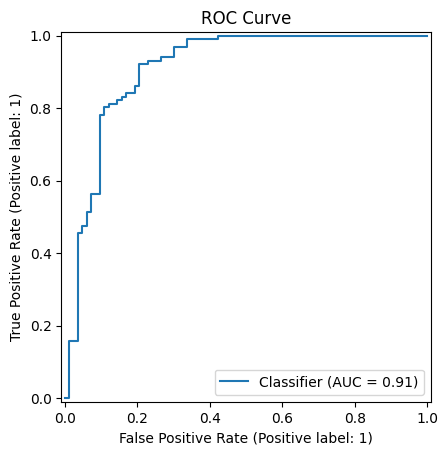

Kernel: Sigmoid
              precision    recall  f1-score   support

           0       0.64      0.61      0.63        83
           1       0.69      0.71      0.70       101

    accuracy                           0.67       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.67      0.67      0.67       184

Cross Validation (mean ± std): 64.99% ± 2.67%
ROC AUC Score: 73.85%
F1 Score: 70.24%


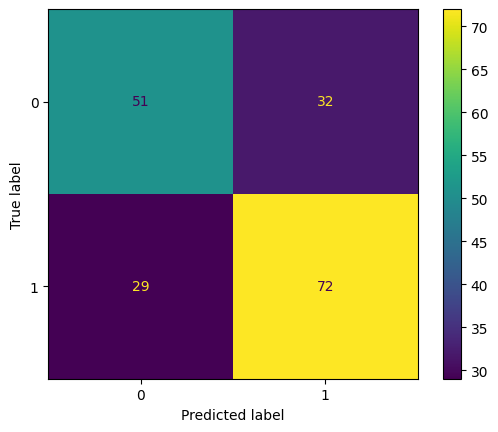

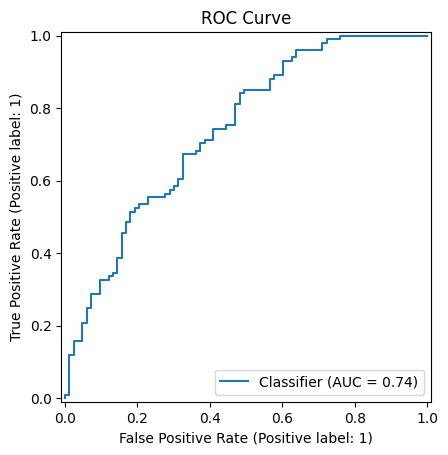

Kernel: rbf
              precision    recall  f1-score   support

           0       0.95      0.76      0.85        83
           1       0.83      0.97      0.89       101

    accuracy                           0.88       184
   macro avg       0.89      0.86      0.87       184
weighted avg       0.89      0.88      0.87       184

Cross Validation (mean ± std): 85.97% ± 2.32%
ROC AUC Score: 90.62%
F1 Score: 89.50%


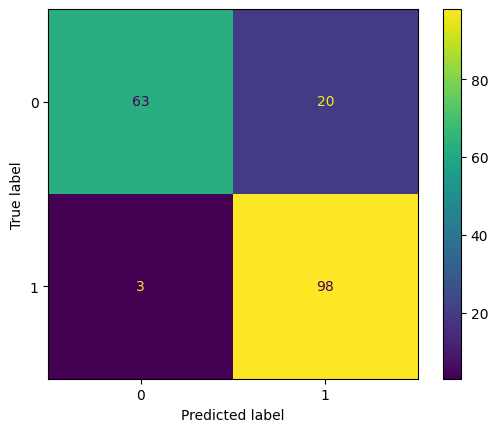

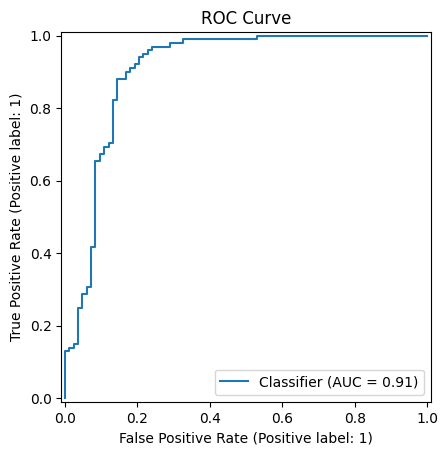

Kernel: Poly
              precision    recall  f1-score   support

           0       0.97      0.71      0.82        83
           1       0.80      0.98      0.88       101

    accuracy                           0.86       184
   macro avg       0.89      0.85      0.85       184
weighted avg       0.88      0.86      0.85       184

Cross Validation (mean ± std): 86.24% ± 1.67%
ROC AUC Score: 92.14%
F1 Score: 88.39%


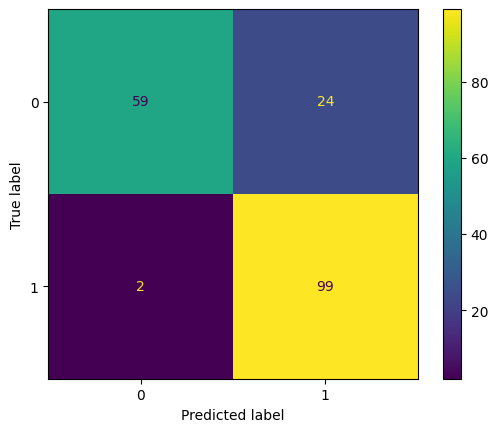

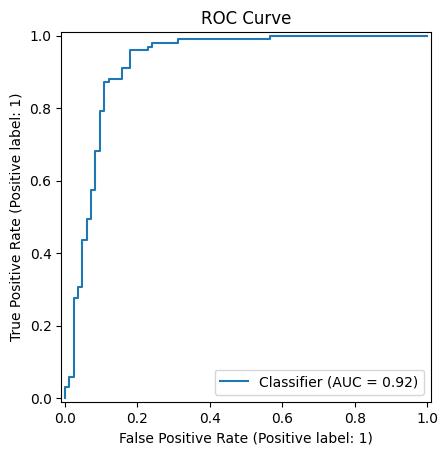

In [104]:
from sklearn.svm import SVC

kernel = []
print("Kernel: linear")
classifier = SVC(kernel='linear', probability=True)
kernel.append(evaluate(classifier)["f1"])

print("Kernel: Sigmoid")
classifier = SVC(kernel='sigmoid', probability=True)
kernel.append(evaluate(classifier)["f1"])

print("Kernel: rbf")
classifier = SVC(kernel='rbf', probability=True)
kernel.append(evaluate(classifier)["f1"])

print("Kernel: Poly")
classifier = SVC(kernel='poly', probability=True)
kernel.append(evaluate(classifier)["f1"])

C: 0.1
              precision    recall  f1-score   support

           0       0.92      0.70      0.79        83
           1       0.79      0.95      0.86       101

    accuracy                           0.84       184
   macro avg       0.86      0.82      0.83       184
weighted avg       0.85      0.84      0.83       184

Cross Validation (mean ± std): 84.07% ± 3.18%
ROC AUC Score: 0.9253


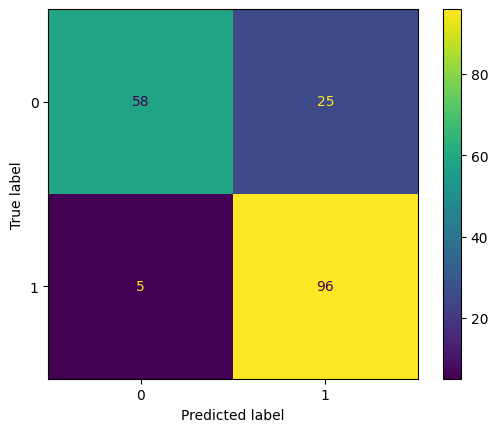

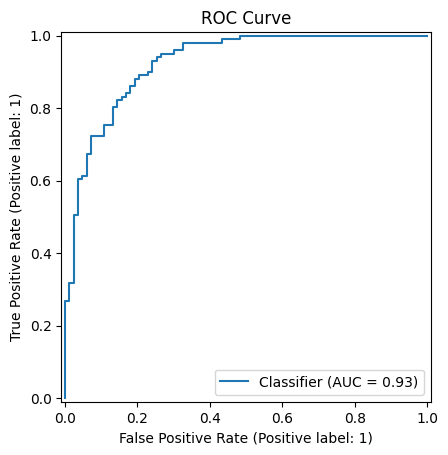

C: 1
              precision    recall  f1-score   support

           0       0.95      0.76      0.85        83
           1       0.83      0.97      0.89       101

    accuracy                           0.88       184
   macro avg       0.89      0.86      0.87       184
weighted avg       0.89      0.88      0.87       184

Cross Validation (mean ± std): 85.97% ± 2.32%
ROC AUC Score: 0.9062


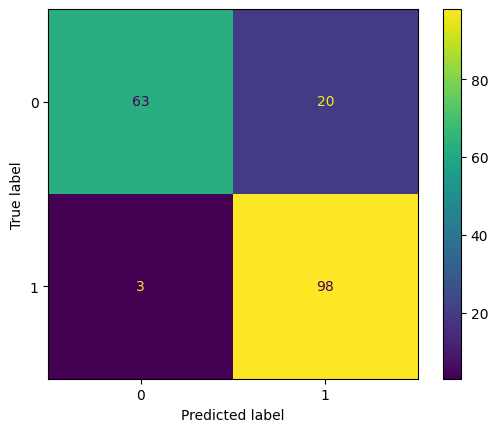

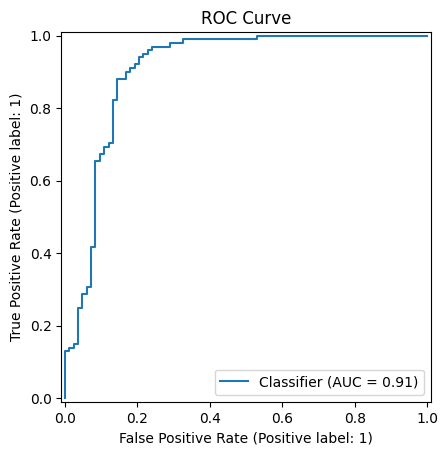

C: 2
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        83
           1       0.84      0.97      0.90       101

    accuracy                           0.88       184
   macro avg       0.90      0.87      0.88       184
weighted avg       0.89      0.88      0.88       184

Cross Validation (mean ± std): 86.11% ± 2.44%
ROC AUC Score: 0.9118


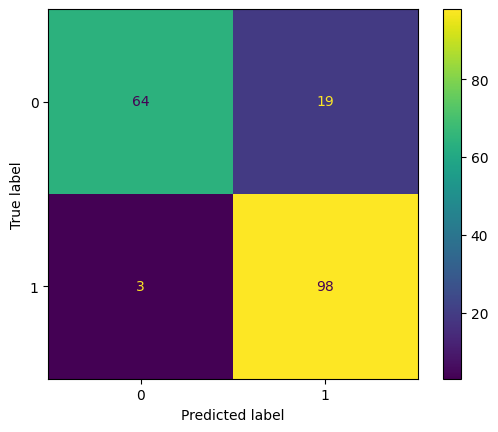

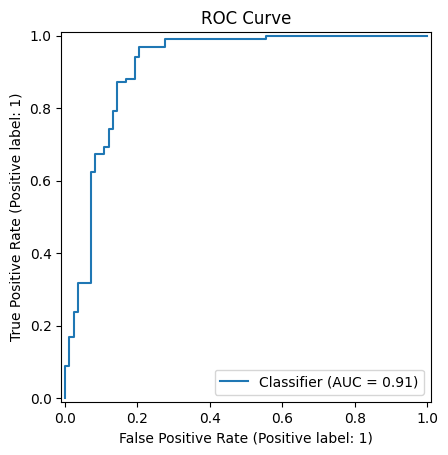

C: 10
              precision    recall  f1-score   support

           0       0.95      0.73      0.83        83
           1       0.82      0.97      0.89       101

    accuracy                           0.86       184
   macro avg       0.88      0.85      0.86       184
weighted avg       0.88      0.86      0.86       184

Cross Validation (mean ± std): 85.97% ± 0.70%
ROC AUC Score: 0.9091


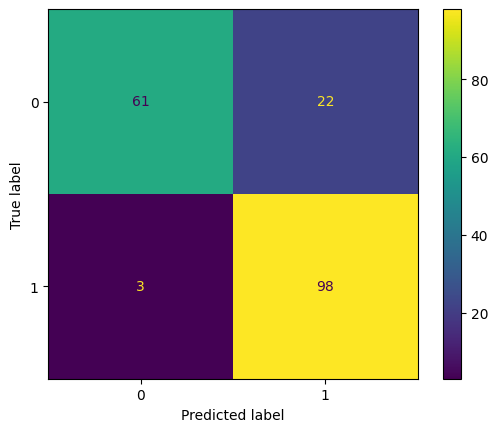

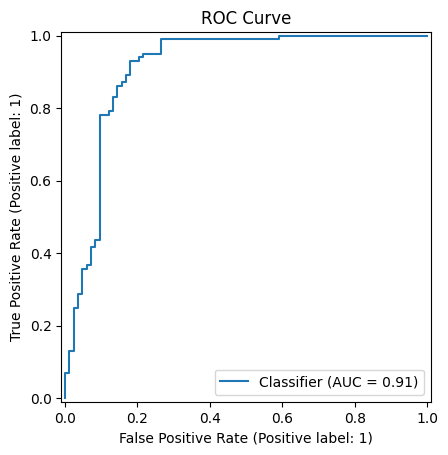

C: 100
              precision    recall  f1-score   support

           0       0.92      0.73      0.82        83
           1       0.81      0.95      0.88       101

    accuracy                           0.85       184
   macro avg       0.87      0.84      0.85       184
weighted avg       0.86      0.85      0.85       184

Cross Validation (mean ± std): 82.84% ± 2.19%
ROC AUC Score: 0.8742


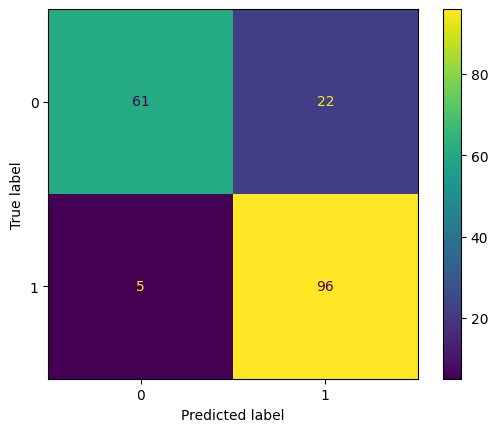

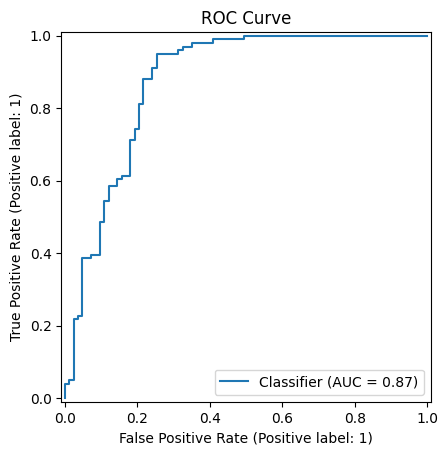

In [ ]:
print("C: 0.1")
classifier = SVC(C=0.1, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 1")
classifier = SVC(C=1, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 10")
classifier = SVC(C=10, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 100")
classifier = SVC(C=100, kernel='rbf', probability=True)
evaluate(classifier)


C: 0.1
              precision    recall  f1-score   support

           0       0.92      0.70      0.79        83
           1       0.79      0.95      0.86       101

    accuracy                           0.84       184
   macro avg       0.86      0.82      0.83       184
weighted avg       0.85      0.84      0.83       184

Cross Validation (mean ± std): 84.07% ± 3.18%
ROC AUC Score: 92.53%
F1 Score: 86.49%


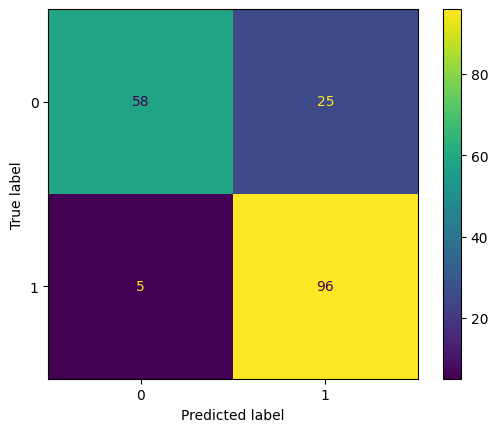

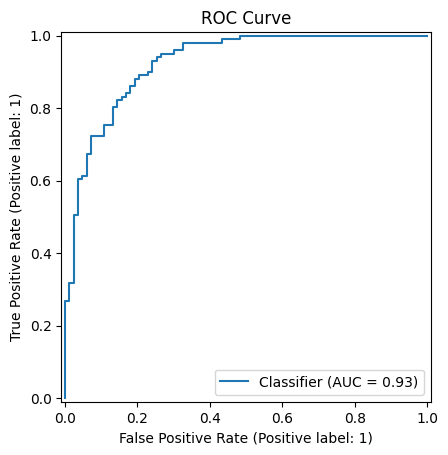

C: 1
              precision    recall  f1-score   support

           0       0.95      0.76      0.85        83
           1       0.83      0.97      0.89       101

    accuracy                           0.88       184
   macro avg       0.89      0.86      0.87       184
weighted avg       0.89      0.88      0.87       184

Cross Validation (mean ± std): 85.97% ± 2.32%
ROC AUC Score: 90.62%
F1 Score: 89.50%


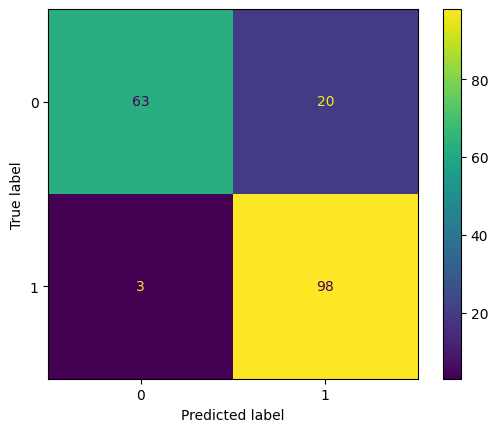

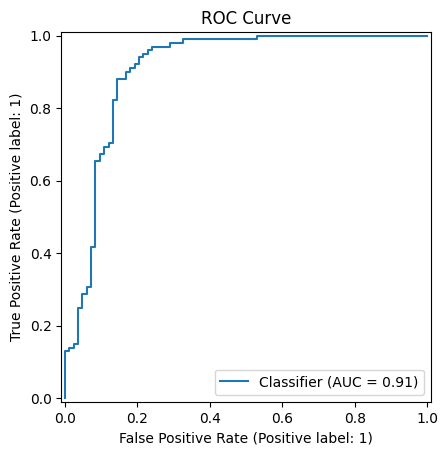

C: 2
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        83
           1       0.84      0.97      0.90       101

    accuracy                           0.88       184
   macro avg       0.90      0.87      0.88       184
weighted avg       0.89      0.88      0.88       184

Cross Validation (mean ± std): 86.11% ± 2.44%
ROC AUC Score: 91.18%
F1 Score: 89.91%


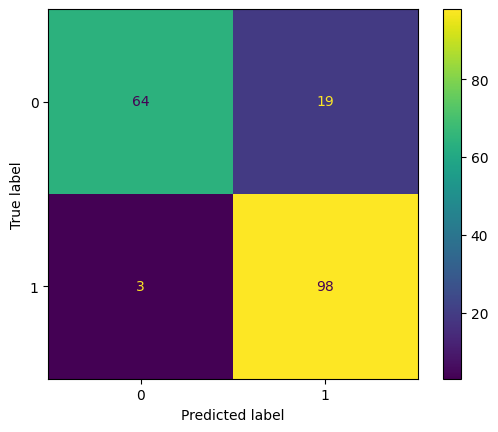

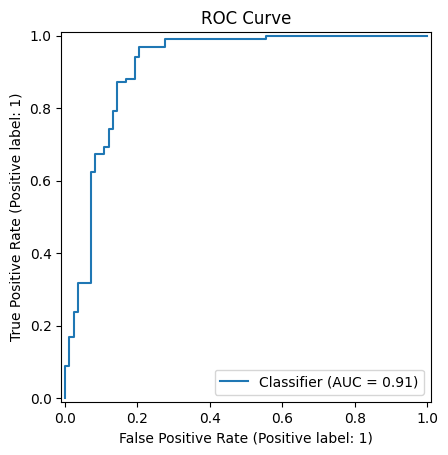

C: 3
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        83
           1       0.84      0.97      0.90       101

    accuracy                           0.88       184
   macro avg       0.90      0.87      0.88       184
weighted avg       0.89      0.88      0.88       184

Cross Validation (mean ± std): 86.11% ± 1.73%
ROC AUC Score: 90.90%
F1 Score: 89.91%


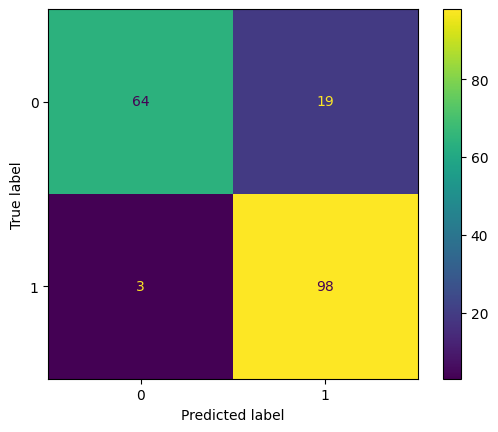

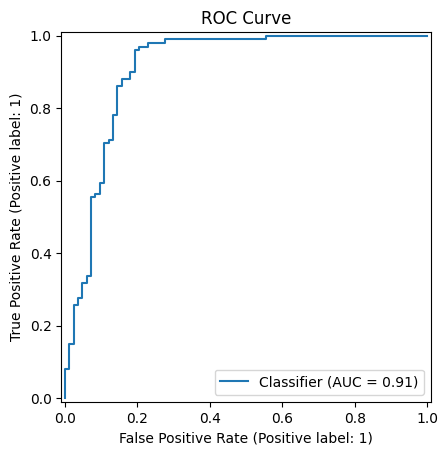

C: 4
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        83
           1       0.84      0.98      0.90       101

    accuracy                           0.89       184
   macro avg       0.90      0.88      0.88       184
weighted avg       0.90      0.89      0.88       184

Cross Validation (mean ± std): 86.38% ± 1.48%
ROC AUC Score: 91.05%
F1 Score: 90.41%


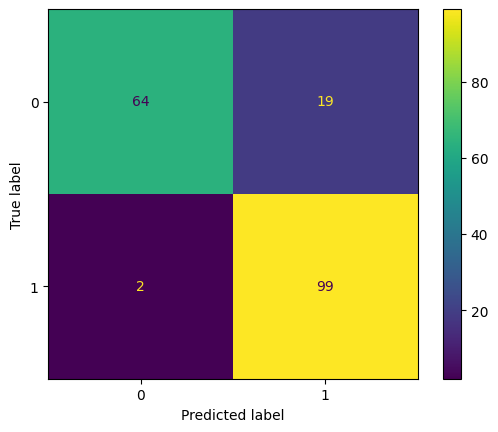

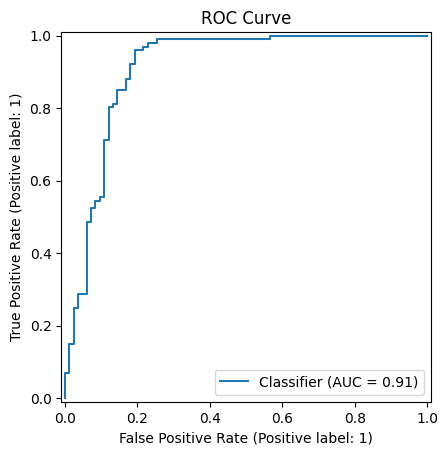

C: 5
              precision    recall  f1-score   support

           0       0.97      0.76      0.85        83
           1       0.83      0.98      0.90       101

    accuracy                           0.88       184
   macro avg       0.90      0.87      0.88       184
weighted avg       0.89      0.88      0.88       184

Cross Validation (mean ± std): 86.51% ± 1.07%
ROC AUC Score: 91.14%
F1 Score: 90.00%


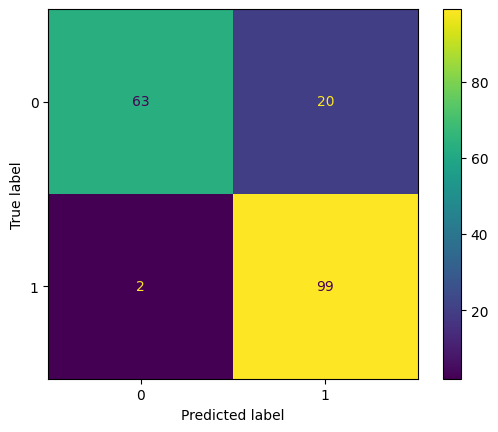

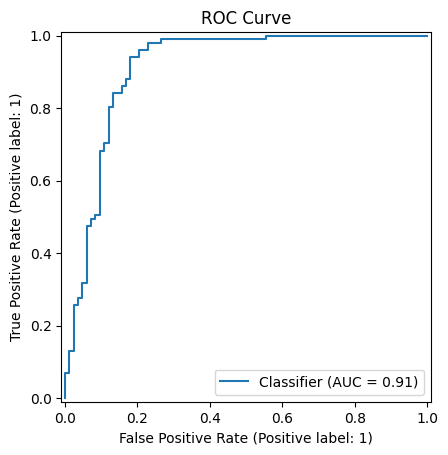

C: 6
              precision    recall  f1-score   support

           0       0.97      0.73      0.84        83
           1       0.82      0.98      0.89       101

    accuracy                           0.87       184
   macro avg       0.89      0.86      0.86       184
weighted avg       0.89      0.87      0.87       184

Cross Validation (mean ± std): 86.51% ± 0.78%
ROC AUC Score: 91.08%
F1 Score: 89.19%


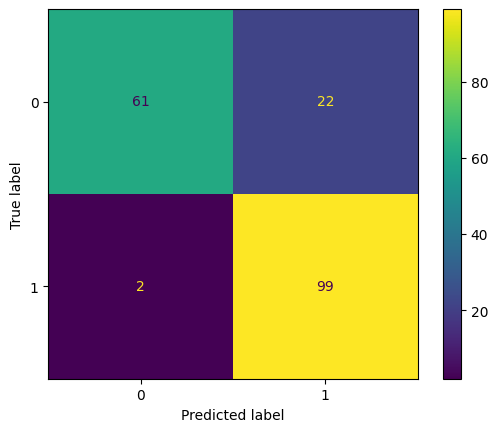

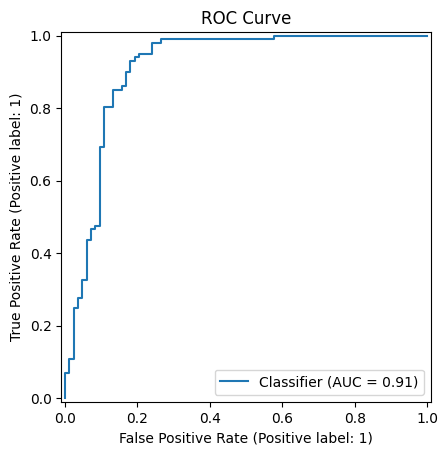

C: 7
              precision    recall  f1-score   support

           0       0.97      0.73      0.84        83
           1       0.82      0.98      0.89       101

    accuracy                           0.87       184
   macro avg       0.89      0.86      0.86       184
weighted avg       0.89      0.87      0.87       184

Cross Validation (mean ± std): 86.10% ± 0.51%
ROC AUC Score: 90.89%
F1 Score: 89.19%


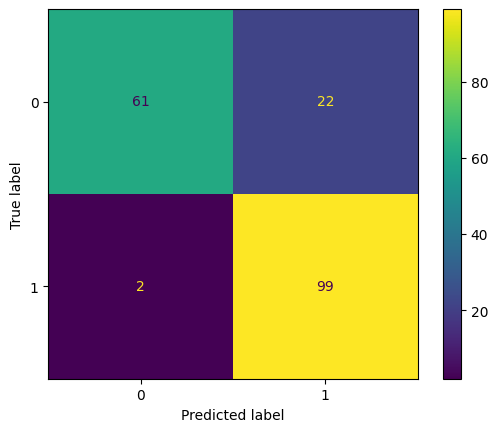

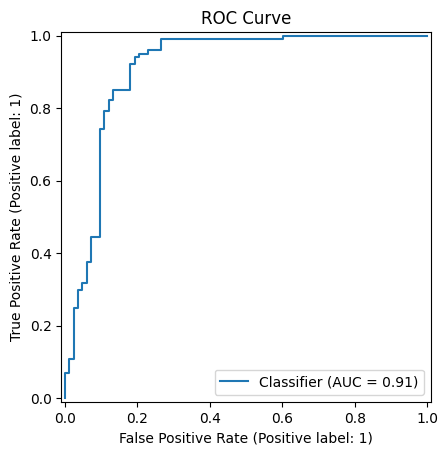

C: 8
              precision    recall  f1-score   support

           0       0.97      0.73      0.84        83
           1       0.82      0.98      0.89       101

    accuracy                           0.87       184
   macro avg       0.89      0.86      0.86       184
weighted avg       0.89      0.87      0.87       184

Cross Validation (mean ± std): 85.97% ± 0.31%
ROC AUC Score: 90.87%
F1 Score: 89.19%


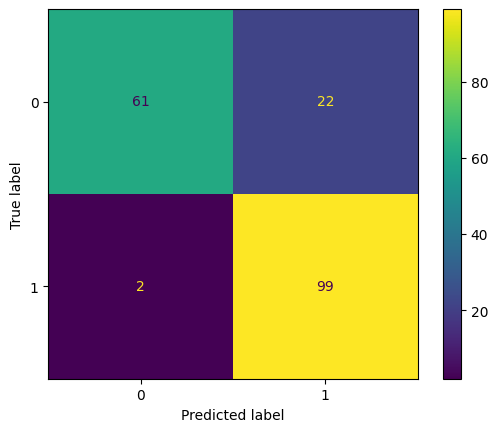

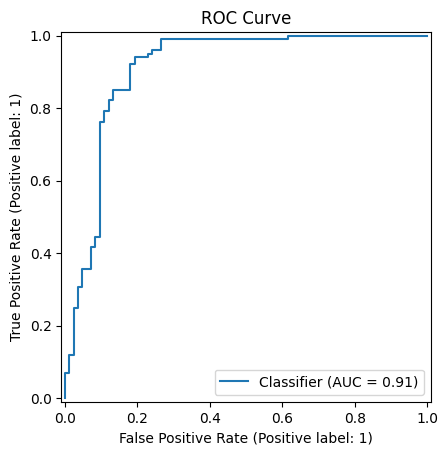

C: 9
              precision    recall  f1-score   support

           0       0.95      0.73      0.83        83
           1       0.82      0.97      0.89       101

    accuracy                           0.86       184
   macro avg       0.88      0.85      0.86       184
weighted avg       0.88      0.86      0.86       184

Cross Validation (mean ± std): 85.83% ± 0.82%
ROC AUC Score: 90.89%
F1 Score: 88.69%


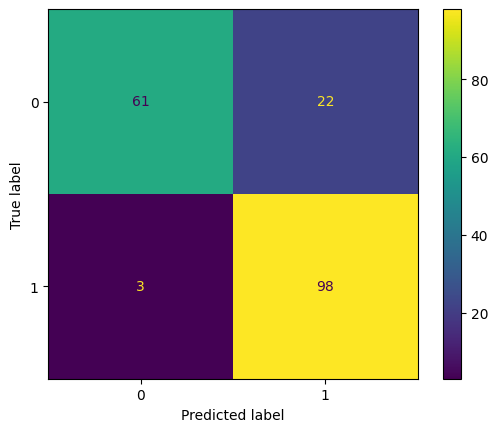

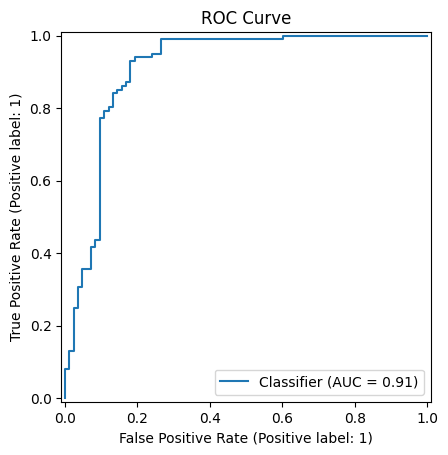

In [ ]:
c = []

for i in range(10):
    if i == 0:
        i = 0.1
    print(f"C: {i}")
    classifier = SVC(C=i, kernel='rbf', probability=True)
    c.append(evaluate(classifier)["f1"])


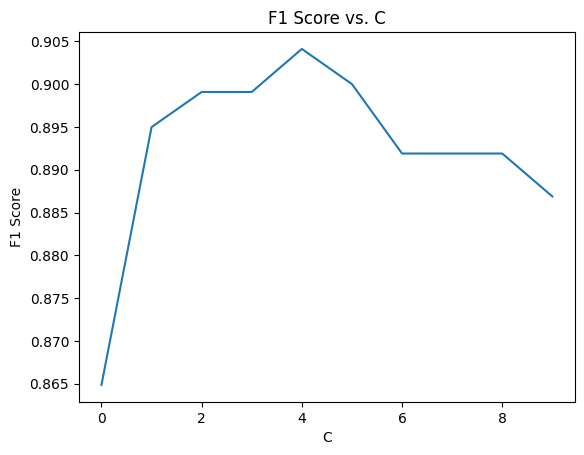

In [123]:
plt.plot(c)
plt.title('F1 Score vs. C')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.show()

gamma: scale
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        83
           1       0.84      0.98      0.90       101

    accuracy                           0.89       184
   macro avg       0.90      0.88      0.88       184
weighted avg       0.90      0.89      0.88       184

Cross Validation (mean ± std): 86.38% ± 1.48%
ROC AUC Score: 0.9105


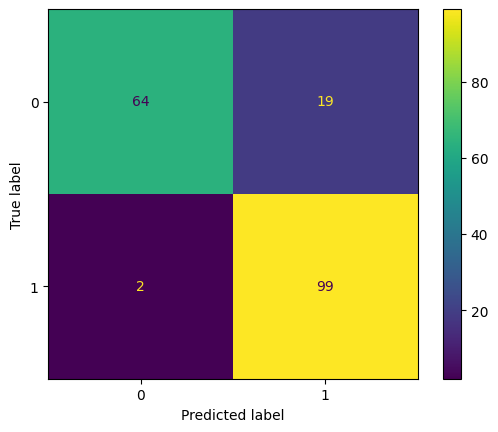

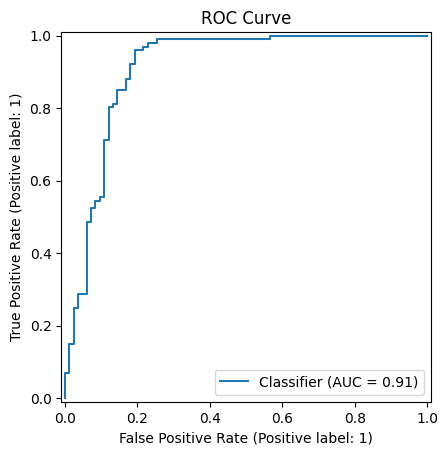

gamma: auto
              precision    recall  f1-score   support

           0       0.93      0.75      0.83        83
           1       0.82      0.95      0.88       101

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.85       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 85.29% ± 1.73%
ROC AUC Score: 0.9129


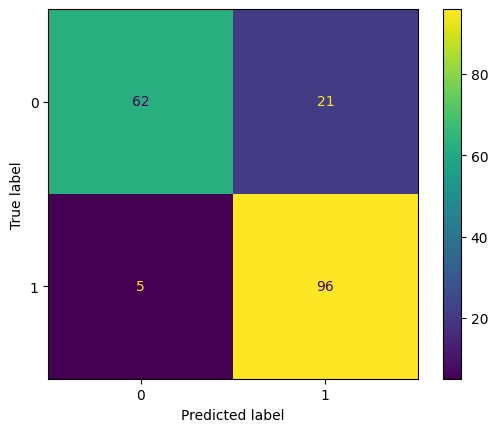

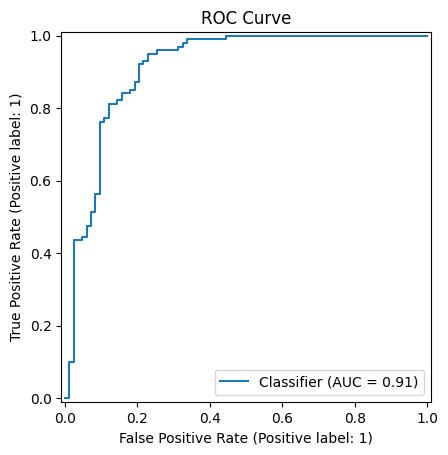

gamma: 0.01
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        83
           1       0.84      0.91      0.87       101

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

Cross Validation (mean ± std): 84.47% ± 3.79%
ROC AUC Score: 0.9238


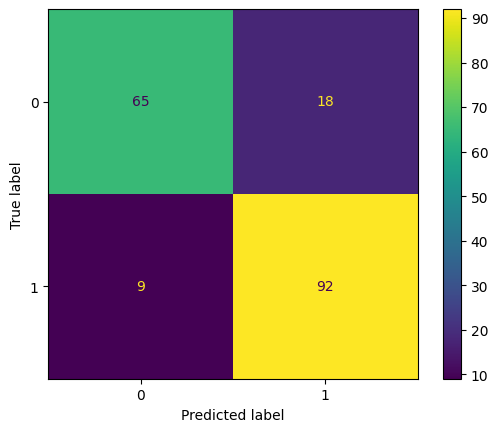

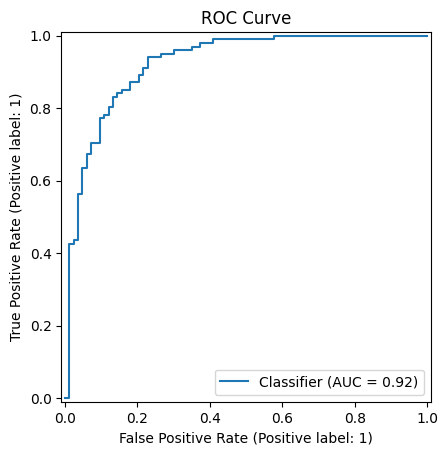

gamma: 0.1
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        83
           1       0.82      0.96      0.89       101

    accuracy                           0.86       184
   macro avg       0.88      0.85      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 85.43% ± 2.36%
ROC AUC Score: 0.9127


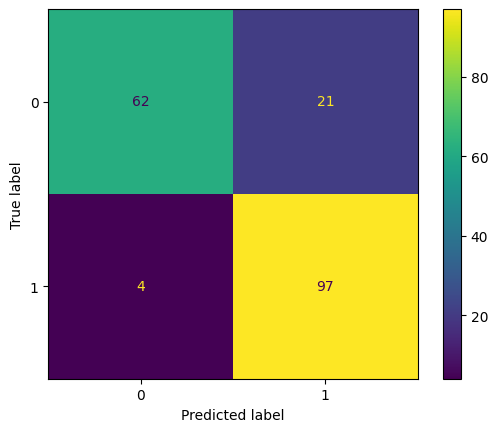

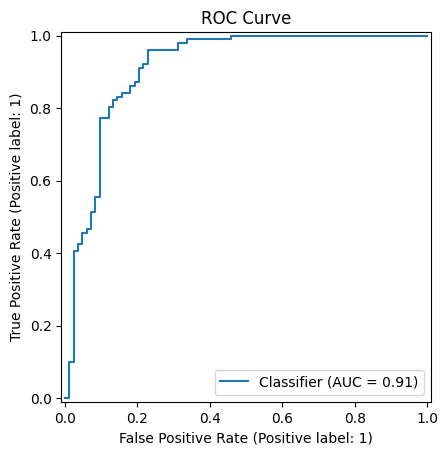

gamma: 1
              precision    recall  f1-score   support

           0       0.97      0.75      0.84        83
           1       0.82      0.98      0.90       101

    accuracy                           0.88       184
   macro avg       0.90      0.86      0.87       184
weighted avg       0.89      0.88      0.87       184

Cross Validation (mean ± std): 86.38% ± 1.48%
ROC AUC Score: 0.9086


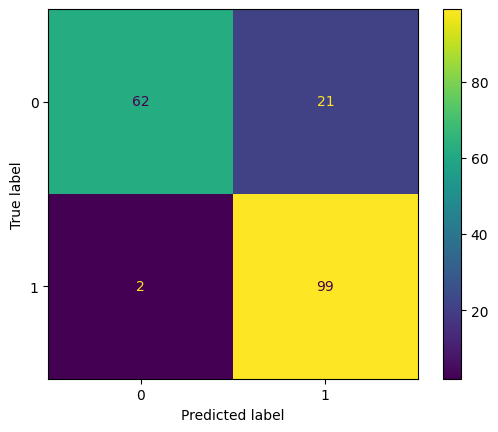

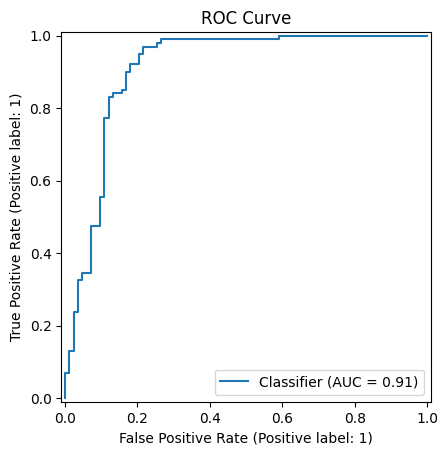

In [ ]:
print("gamma: scale")
classifier = SVC(C=4, kernel='rbf', gamma='scale',probability=True)
evaluate(classifier)

print("gamma: auto")
classifier = SVC(C=4, kernel='rbf', gamma='auto', probability=True)
evaluate(classifier)
